## Plot the history of a manuscript

Make a graph of the evolution of the manuscript "An eco-cultural model predicts..." (PNAS 2016)

We started this paper in April 2015, submitted it in October 2015, and had it accepted by the journal at the end of December 2015. We saved the raw `.tex` files for all of the versions (including the intermediate versions before and after submission) with the convention: `neanderthal_manuscript_8_04_other_info.tex` denoting the version from August 4th. For this reason, in the script below the date can be scraped directly from the file title using regular expressions, and the actual time can then be computed from the date. The progress of changes to the manuscript is recorded using the `ndiff` function from the `difflib` module, which records the number of characters deleted, inserted, and modified between two strings.

Useful links:
[Plotting dates with matplotlib](http://matplotlib.org/examples/pylab_examples/date_demo2.html)

Manuscript was written by William Gilpin, Marcus W. Feldman, and Kenichi Aoki

This analysis was done by William Gilpin

### Define some preliminary functions

In [ ]:
def print_status(iter_val, final_val, max_val=79):
    '''
    Print a progress bar in a loop calculation
    
    Parameters
    ----------
    
    iter_val : int
        The current value of the iteration variable
    
    final_val : int
        The maximum value that the iteration variable 
        will eventually attain
    
    max_val : int
        The maximum width of a line. Defaults to PEP recommendation of 79
    
    
    Note: This only works in Python 3 because of the unique properties of 
            the print() function.
    '''
 
    iter_val_scaled = int((iter_val/final_val)*max_val)
    remainder = max_val-int(((final_val-1)/final_val)*max_val)
    
    print('', end="\r")
    print('[', end="")
    for jj in range(iter_val_scaled+remainder):
        print ('#', end="")
    for jj in range(max_val-iter_val_scaled-remainder):     
        print (' ', end="")
    print(']',end="")

### Load the data and perform the analysis

In [371]:
%pylab inline

import glob
import re
import time
from difflib import ndiff

# load a list of all of the manuscript versions
#all_documents = glob.glob('Users/william/neanderthal_paper/previous_versions/neanderthal_manuscript_*.tex')
all_changes = list()
all_insertions = list()
all_deletions = list()
all_dates = list()


for ind, document in enumerate(all_documents):
    
    # use the optional print status function defined above
    print_status(ind, len(all_documents))
    
    # scrape the date from the title of each version
    result = re.search('_([0-9])*_[0-9]*(\.|_)', document)
    date_val = result.group(0)[1:-1]
    date_obj = time.strptime(date_val, "%m_%d")  
    
    with open(document,'r') as myfile:
        data=myfile.read()
        # restrict to just main body of article
        result = re.search('begin\{document\}', data)
        start_ind = result.span()[-1]
        result = re.search('end\{document\}', data)
        stop_ind = result.span()[0]
        data = data[start_ind:stop_ind]
    
    if document==all_documents[0]:
        prev_data=data
    
    all_diff = ndiff(data, prev_data)
    
    changes = [thing for thing in all_diff]
    insertions = [thing for thing in changes if thing.startswith('+ ')]
    deletions = [thing for thing in changes if thing.startswith('- ')]
    
    all_dates.append(date_obj.tm_yday)
    all_changes.append( len(changes) )
    all_insertions.append( len(insertions) )
    all_deletions.append( len(insertions) )
    
    prev_data = data
    


Populating the interactive namespace from numpy and matplotlib
[###############################################################################]

### Plot the resulting data

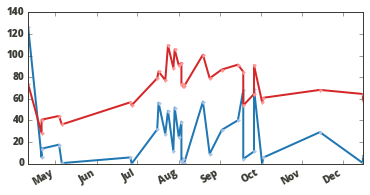

In [449]:
import matplotlib.dates as mdates

# ugly method to sort data by values in just the 0th column
data_lumped = array([all_dates, all_changes, all_insertions, all_deletions]).T
sorted_data = data_lumped[data_lumped[:,0].argsort()]

sorted_dates = sorted_data[:,0]
sorted_changes = sorted_data[:,1]/1000
sorted_insertions = sorted_data[:,2]/1000
sorted_deletions = sorted_data[:,3]/1000

figure(figsize=(6,3))

hold(True)



gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
gca().xaxis.set_major_locator(MonthLocator(range(1, 13), bymonthday=1, interval=1))

plot(sorted_dates, sorted_deletions+sorted_insertions,'-',markersize=8)
plot(sorted_dates, sorted_deletions+sorted_insertions,'.')
plot([])
plot([])
plot([])
plot([])
plot(sorted_dates, sorted_changes,'-',markersize=8)
plot(sorted_dates, sorted_changes,'.')

gcf().autofmt_xdate()

# savefig('manuscript_history.pdf')